In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import text2emotion as te
from openpyxl import load_workbook

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# This function outputs the text2emotion vector of the single line. 
def oneline_text2emotion(line) :
    vec = [0,0,0,0,0]
    
    # Text2Emotion scores the line
    score = te.get_emotion(line)
    
    vec = [score['Happy'], score['Angry'], score['Surprise'], score['Sad'], score['Fear']]
    
    return vec

In [3]:
# Open spreadsheet with survey results
spreadsheet = load_workbook(filename="SurveyAnswers.xlsx", data_only=True)
sheet = spreadsheet['Emotion Results']

happy = []
sad = []
angry = []
surprise = []
fear = []

# put each result in a list/tuple
for i in range(2, 102):
    happy.append(sheet["G" + str(i)].value)
    sad.append(sheet["H" + str(i)].value)
    angry.append(sheet["I" + str(i)].value)
    surprise.append(sheet["J" + str(i)].value)
    fear.append(sheet["K" + str(i)].value)

In [4]:
# Have Text2Emotion evaluate each line and add result to a list/tuple
file1 = open("lines.txt", 'r')

happyTE = []
sadTE = []
angryTE = []
surpriseTE = []
fearTE = []

for line in file1:
    vec = oneline_text2emotion(line)
    happyTE.append(vec[0])
    sadTE.append(vec[1])
    angryTE.append(vec[2])
    surpriseTE.append(vec[3])
    fearTE.append(vec[4])

file1.close()

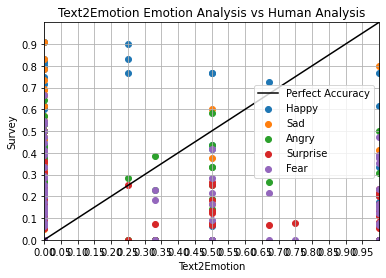

In [5]:
plt.scatter(happyTE, happy)
plt.scatter(sadTE, sad)
plt.scatter(angryTE, angry)
plt.scatter(surpriseTE, surprise)
plt.scatter(fearTE, fear)
plt.plot([0,1], [0, 1], color='black')
plt.title('Text2Emotion Emotion Analysis vs Human Analysis')
plt.xlabel('Text2Emotion')
plt.ylabel('Survey')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(np.arange(0, 1, step=0.05))
plt.yticks(np.arange(0, 1, step=0.1))
plt.rcParams["figure.figsize"] = (12,6)
plt.legend(['Perfect Accuracy','Happy', 'Sad', 'Angry', 'Surprise', 'Fear'])
plt.show()

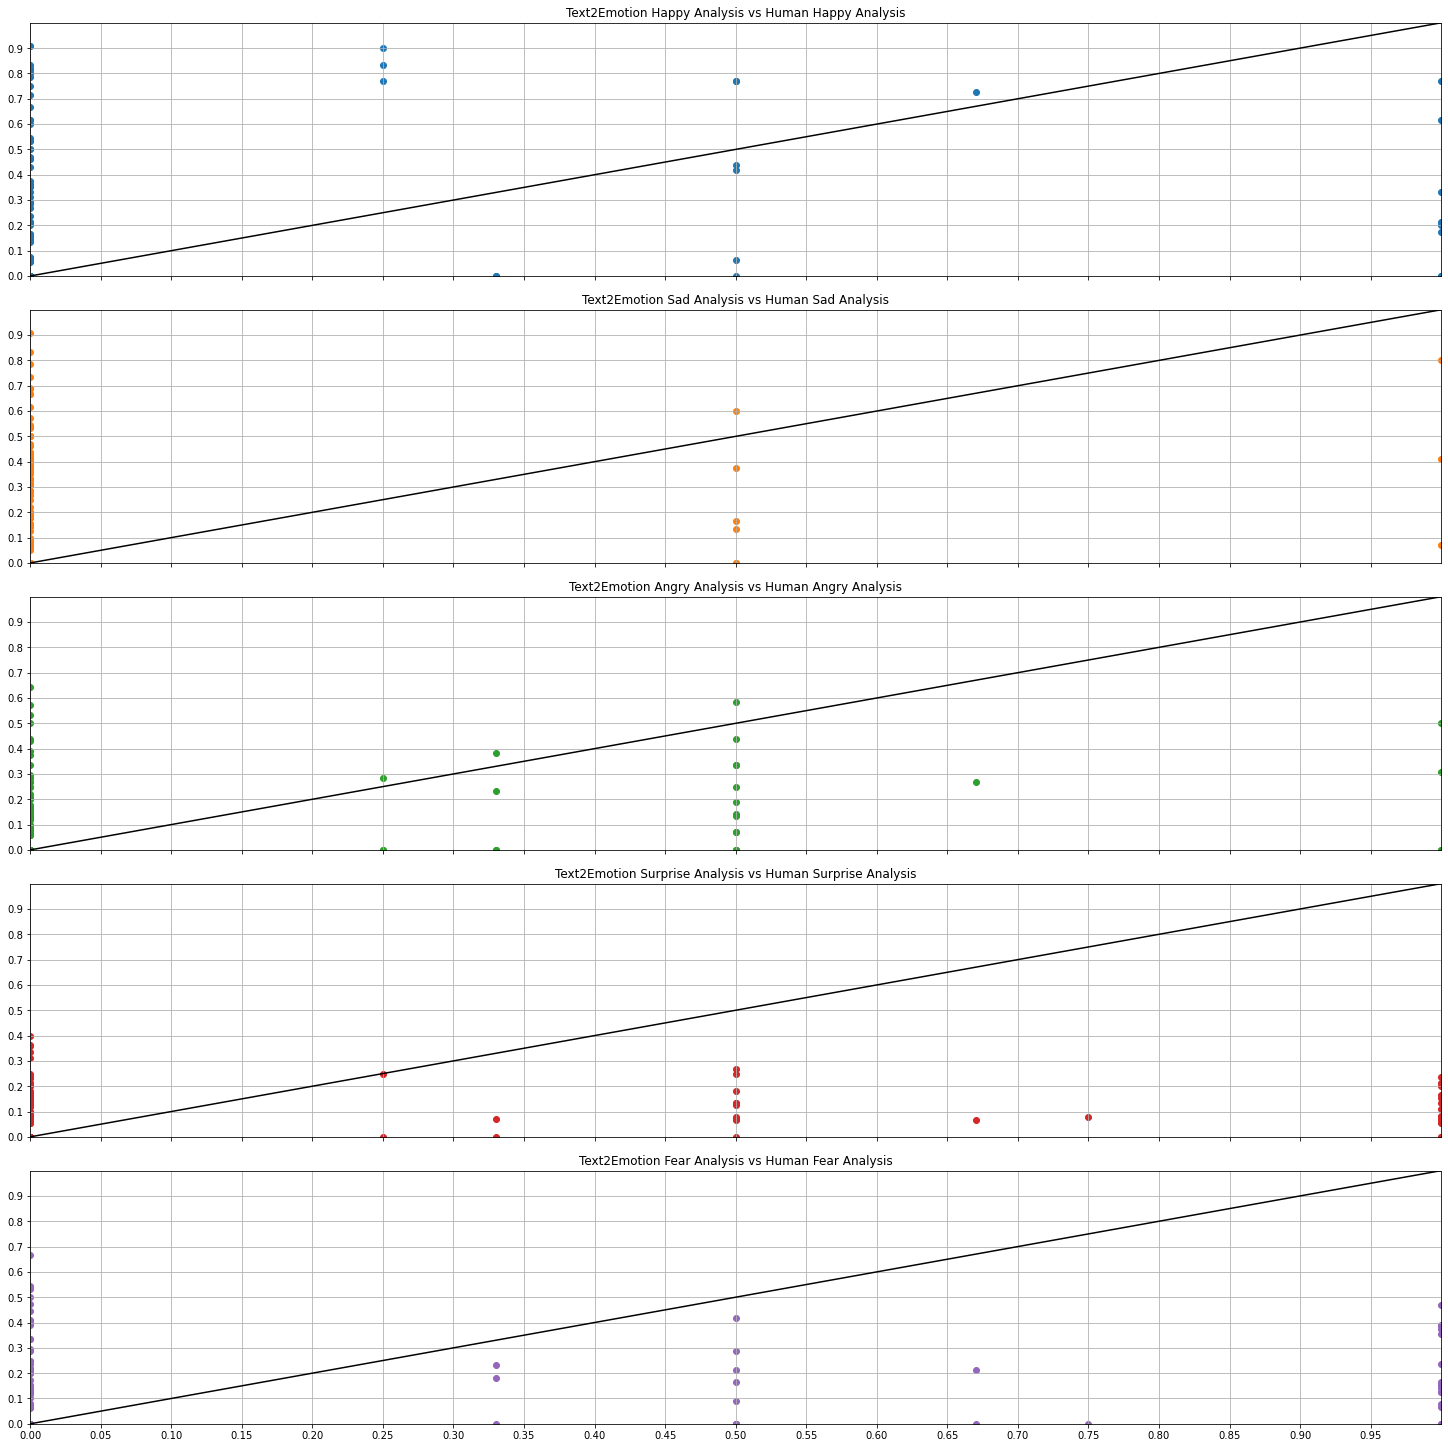

In [6]:
fig, axs = plt.subplots(5, sharex=True, sharey=True, constrained_layout = True, figsize=(20,20))

axs[0].scatter(happyTE, happy, color='C0')
axs[0].set_title('Text2Emotion Happy Analysis vs Human Happy Analysis')

axs[1].scatter(sadTE, sad, color='C1')
axs[1].set_title('Text2Emotion Sad Analysis vs Human Sad Analysis')

axs[2].scatter(angryTE, angry, color='C2')
axs[2].set_title('Text2Emotion Angry Analysis vs Human Angry Analysis')

axs[3].scatter(surpriseTE, surprise, color='C3')
axs[3].set_title('Text2Emotion Surprise Analysis vs Human Surprise Analysis')

axs[4].scatter(fearTE, fear, color='C4')
axs[4].set_title('Text2Emotion Fear Analysis vs Human Fear Analysis')

for ax in axs.flat:
    ax.grid(True)
    ax.plot([0,1], [0, 1], color='black')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xticks(np.arange(0, 1, step=0.05))
    ax.set_yticks(np.arange(0, 1, step=0.1))

In [7]:
c = 0

for i in range(0, 100):
    if happyTE[i] == happy[i]:
        c += 1
    if sadTE[i] == sad[i]:
        c += 1
    if angryTE[i] == angry[i]:
        c += 1
    if surpriseTE[i] == surprise[i]:
        c += 1
    if fearTE[i] == fear[i]:
        c += 1

print("Objective Accuracy of Text2Emotion is " + str(c/500))

Objective Accuracy of Text2Emotion is 0.212


In [9]:
a = 0

for i in range(0, 100):
    a += (1-abs(happy[i] - happyTE[i]))
    a += (1-abs(sad[i] - sadTE[i]))
    a += (1-abs(angry[i] - angryTE[i]))
    a += (1-abs(surprise[i] - surpriseTE[i]))
    a += (1-abs(fear[i] - fearTE[i]))
    

print("Overall Accuracy of Text2Emotion is " + str(a/500))

Overall Accuracy of Text2Emotion is 0.7275255929520891
